In [1]:
# setting up the development environment
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from sklearn.model_selection import train_test_split

#Ensure plots show inline
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load dataset from github repo
url = "https://raw.githubusercontent.com/Rodney-Jr/Thrive_Internship_ML_A/refs/heads/main/customer_support_tickets_dirty.csv"
df = pd.read_csv(url)

df.head() #inspecting first few rows(head()) of the datatset.

,text,label,ticket_id,agent_name
0,Where can I find API rate limits documentation?,Othr,1000,Dana
1,Can I migrate data from Freshdesk?,Othr,1001,Bob
2,Cannot update billing address; page keeps relo...,billing,1002,Charlie
3,Looking for a product roadmap or upcoming feat...,other,1003,Dana
4,Dark mode toggled but UI stays light.,Tech-support,1004,Alice


In [3]:
df.tail() # also to check the dataset

,text,label,ticket_id,agent_name
515,Currency converted incorrectly; expected USD. ...,Billng,1515,Charlie
516,Can't verify phone number; code not sent.,ACCOUNT,1516,Alice
517,Dark mode toggled but UI stays light.,Tech,1517,Charlie
518,Search results page is blank after entering a ...,Tech,1518,Dana
519,Payment failed during checkout with card endin...,Billng,1519,Alice


In [4]:
df.shape #checking the number of rows and columns

(520, 4)

In [5]:
df.info() #getting the basic information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        495 non-null    object
 1   label       495 non-null    object
 2   ticket_id   520 non-null    int64 
 3   agent_name  520 non-null    object
dtypes: int64(1), object(3)
memory usage: 16.4+ KB


In [6]:
#checking for missing or duplicated data
df.isnull().sum() #checking for missing values
df.duplicated().sum() #checking for duplicated values

0

In [7]:
df.drop_duplicates(inplace=True) #dropping the duplicated values found
df =df.dropna() #dropping the missing values found

In [8]:
df.describe() #generates descriptive statistics of the dataframe

,ticket_id
count,472.000000
mean,1259.786017
std,149.518061
min,1000.000000
25%,1133.750000
50%,1259.500000
75%,1387.500000
max,1519.000000


In [9]:
df.describe(include='object') #generates descriptive statistics of the dataframe

,text,label,agent_name
count,472,472,472
unique,173,16,4
top,Do you offer discounts for students or NGOs?,Accnt,Alice
freq,16,41,132


In [10]:
df['label'].value_counts() #checking the distribution of the target variable
df['agent_name'].value_counts() #checking the distribution of the agent_name

agent_name
Alice      132
Bob        120
Charlie    115
Dana       105
Name: count, dtype: int64

In [11]:
#df['label'] = df['label'].str.lower().replace({'othr': 'other'}) #fix inconsistent labels replace"othr" with "other"
#df['label'] = df['label'].str.lower().replace({'OTHER': 'other'}) #fix inconsistent labels replace"OTHER" with "other"

In [12]:
# alternative to fix corrections --> determine the unique valueso of the column 'label'

df['label'].unique()


array(['Othr', 'billing', 'other', 'Tech-support', 'account', 'technical',
       'Accnt', 'OTHER', 'TECHNICAL', 'ACCOUNT', 'BILLING', 'Other ',
       'Billng', 'Billing ', ' Account ', ' Tech'], dtype=object)

In [13]:
df['label'].nunique() # no if items in the column 'label'

16

In [14]:
df['label'].value_counts() # see items in the column 'label'

label
Accnt           41
 Tech           38
ACCOUNT         36
Othr            35
Billng          34
Other           33
other           32
technical       31
Billing         31
TECHNICAL       30
billing         25
OTHER           25
BILLING         23
Tech-support    20
 Account        20
account         18
Name: count, dtype: int64

In [15]:
# create a dictionary for corrections

Fixings = {
           'Billng' : 'Billing',
           'billing' : 'Billing',
           'BILLING' : 'Billing',
           'technical' : 'Tech-support',
           'Technical' : 'Tech-support',
           'Tech' : 'Tech-support',
           'TECHNICAL' : 'Tech-support',
           'other' : 'Other',
           'Othr' : 'Other',
           'ACCOUNT' : 'Account',
           'Accnt'   : 'Account',
           'account' :'Account',


           }
df['label'] = df['label'].replace(Fixings)
print(df)

                                                  text         label  \
0      Where can I find API rate limits documentation?         Other   
1                   Can I migrate data from Freshdesk?         Other   
2    Cannot update billing address; page keeps relo...       Billing   
3    Looking for a product roadmap or upcoming feat...         Other   
4                Dark mode toggled but UI stays light.  Tech-support   
..                                                 ...           ...   
515  Currency converted incorrectly; expected USD. ...       Billing   
516          Can't verify phone number; code not sent.       Account   
517              Dark mode toggled but UI stays light.          Tech   
518  Search results page is blank after entering a ...          Tech   
519  Payment failed during checkout with card endin...       Billing   

     ticket_id agent_name  
0         1000       Dana  
1         1001        Bob  
2         1002    Charlie  
3         1003       Da

In [16]:
df['text'] = df['text'].str.strip() #trim text and remove whitespaces

In [17]:
df['label'] = df['label'].str.strip() #trim label and remove white spaces

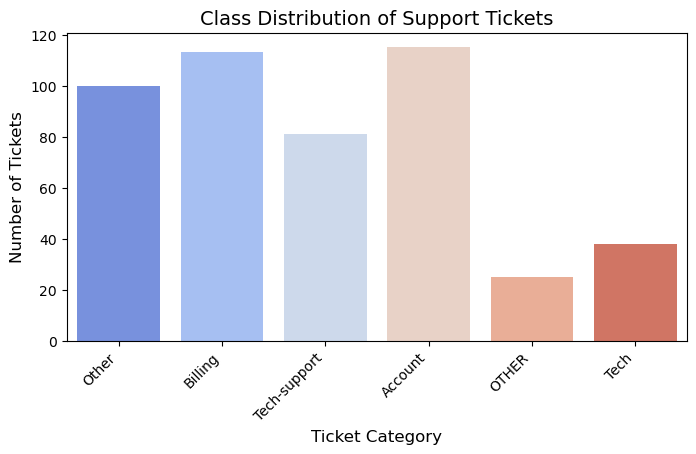

In [18]:
#plot the distribution of the target variable

plt.figure(figsize=(8,4))
sns.countplot(x='label', data=df, hue='label', palette='coolwarm', legend=False)
plt.title('Class Distribution of Support Tickets', fontsize=14)
plt.xlabel('Ticket Category',fontsize=12)
plt.ylabel('Number of Tickets', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

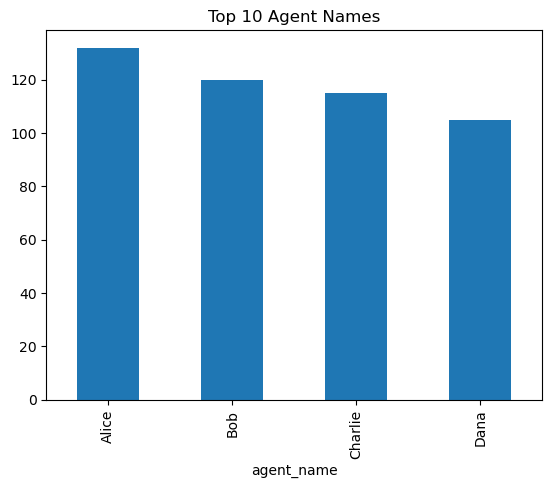

In [19]:
df['agent_name'].value_counts().head(10).plot(kind='bar') #plot the distribution of the agent_name
plt.title("Top 10 Agent Names")
plt.show()

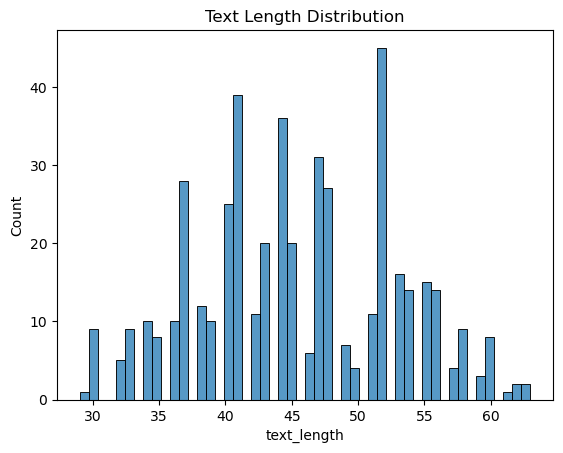

In [20]:
df['text_length'] = df['text'].apply(len) #create a new column with the length of the text
sns.histplot(data=df, x='text_length', bins=50) #plot the distribution of the text length
plt.title("Text Length Distribution")
plt.show()

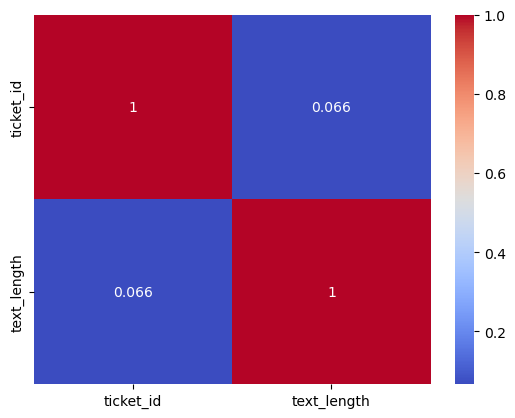

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm') #create a heatmap of the correlation matrix
plt.show()

In [22]:
df.to_csv('customer_support_tickets_cleaned.csv', index=False) #save the cleaned dataset to a new csv file
print("Cleaned dataset saved as 'customer_support_tickets_cleaned.csv")

Cleaned dataset saved as 'customer_support_tickets_cleaned.csv
